In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import random
import optuna

In [2]:
pts = [[random.randint(0, 30), (random.randint(7, 12))] for _ in range(20)]

In [3]:
m = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)


print(f'Initial m : {m.item()} and initial c {c.item()} values')

Initial m : -0.011837520636618137 and initial c 0.03371411934494972 values


In [4]:
x = torch.arange(0, 20)
y = m*x + c

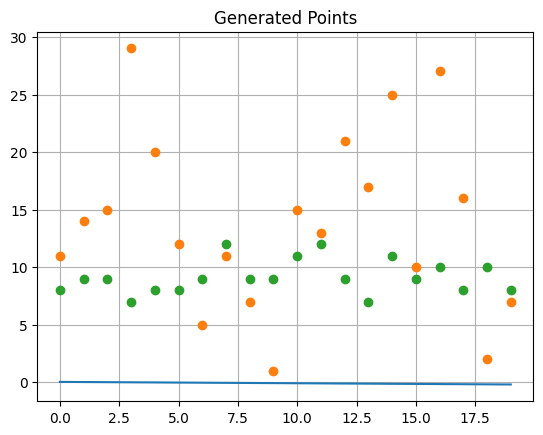

In [5]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.plot(pts, 'o')
plt.grid()
plt.title('Generated Points')
plt.show()


In [6]:
# # defining dist function 
# def pt_line_dist(pt, m, c):
#     hdist = pt[0] - ((pt[1] - c) / m)
#     dist = torch.sqrt((hdist**2 * m ** 2) / (m **2 + 1))
#     return dist

def pt_line_dist(point, m, c):
    """
    Calculate the distance from a point to a line in the form y = mx + c.

    Parameters:
    point (tuple): A tuple (x0, y0) representing the coordinates of the point.
    line (tuple): A tuple (m, c) representing the slope and y-intercept of the line.

    Returns:
    float: The distance from the point to the line.
    """
    x0, y0 = point

    # Calculate the numerator and denominator of the distance formula
    numerator = abs(m * x0 - y0 + c)
    denominator = math.sqrt(m**2 + 1)

    # Calculate the distance
    distance = numerator / denominator

    return distance

In [7]:
import math
def train_model(pts, m, c):

    # training for one epoch
    total_dist = 0.0
    for pt in pts:
        dist = pt_line_dist(pt, m, c)
        total_dist += dist

    m.retain_grad()
    c.retain_grad()
    total_dist.backward(retain_graph=True)
        
    return total_dist, m, c

In [8]:
final_loss, m , c = train_model(pts, m, c)

print(f'Final m {m.item()} and c {c.item()} values')

Final m -0.011837520636618137 and c 0.03371411934494972 values


In [9]:
def objective(trial):
    m_trial = trial.suggest_float('m', -10.0, 10.0)
    c_trial = trial.suggest_float('c', -25, 25)

    m = torch.tensor(m_trial, requires_grad=True)
    c = torch.tensor(c_trial, requires_grad=True)

    loss, m, c = train_model(pts, m, c)

    return loss
    

In [10]:
study = optuna.create_study()

[I 2024-07-21 09:51:12,367] A new study created in memory with name: no-name-21b4ddab-5428-4de1-b0f3-e6b583cf77aa


In [11]:
study.optimize(objective, n_trials=1000)

[I 2024-07-21 09:51:12,374] Trial 0 finished with value: 259.4292907714844 and parameters: {'m': -3.6424681743210403, 'c': 10.783916577026737}. Best is trial 0 with value: 259.4292907714844.
[I 2024-07-21 09:51:12,375] Trial 1 finished with value: 83.33705139160156 and parameters: {'m': -0.9469133654576609, 'c': 23.489768951908673}. Best is trial 1 with value: 83.33705139160156.
[I 2024-07-21 09:51:12,378] Trial 2 finished with value: 222.04833984375 and parameters: {'m': 4.9788304152650085, 'c': -5.10138291708499}. Best is trial 1 with value: 83.33705139160156.
[I 2024-07-21 09:51:12,379] Trial 3 finished with value: 226.3430938720703 and parameters: {'m': 9.85595369791983, 'c': -18.346195480563075}. Best is trial 1 with value: 83.33705139160156.
[I 2024-07-21 09:51:12,381] Trial 4 finished with value: 305.2962951660156 and parameters: {'m': 3.932537485873027, 'c': 16.42762134160558}. Best is trial 1 with value: 83.33705139160156.
[I 2024-07-21 09:51:12,383] Trial 5 finished with valu

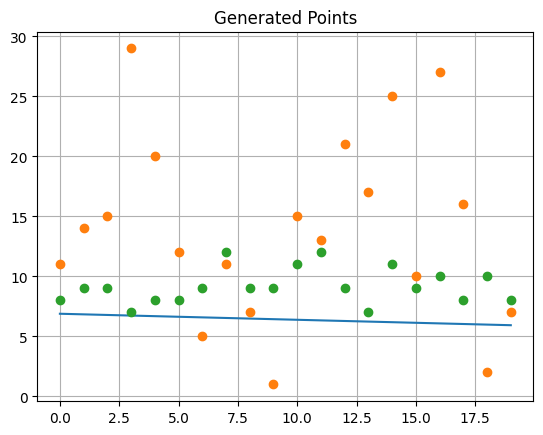

In [12]:
y_pred = -0.05024619514981794 * x + 6.8938087000602
plt.plot(x.detach().numpy(), y_pred.detach().numpy())
plt.plot(pts, 'o')
plt.grid()
plt.title('Generated Points')
plt.show()
